In [2]:
from importlib import reload
import cpclasses
reload(cpclasses)
from cpclasses import *
import torch



In [3]:
class Parabola(torch.nn.Module):
    
    def __init__(self, a = 1, b =1, c = 1):
        super().__init__()
        self.a = torch.nn.Parameter(torch.tensor(float(a)))
        self.b = torch.nn.Parameter(torch.tensor(float(b)))
        self.c = torch.nn.Parameter(torch.tensor(float(c)))

    def forward(self, x):
        y = self.a * x**2 + self.b * x + self.c
        return y

    

# Fit to a parabola

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: xlabel='x', ylabel='y'>

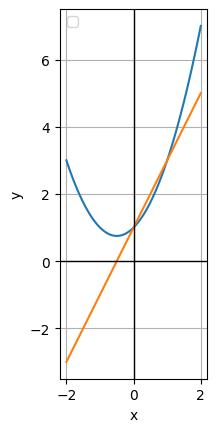

In [4]:
fig, ax = plt.subplots()

parabola = Parabola()
x = torch.linspace(-2, 2, 100, requires_grad=True)
y = parabola(x)


y.backward(torch.ones_like(y))
yp = x.grad
with torch.no_grad():
    ax.plot(x, y)
    ax.plot(x, yp)

format_axis(ax)
coordinate_axes(ax)

In [5]:
optimizer = torch.optim.Adam(parabola.parameters(), lr=0.01)
steps = 10000
x_train = torch.tensor([1.0, 3.0, 5.0])

y_train = torch.tensor([2.0, 4.0, 1.0])
for step in range(steps):
    optimizer.zero_grad()

    y_prediction = parabola(x_train)
    loss = torch.mean((y_prediction - y_train)**2)
    loss.backward()
    
    optimizer.step()

    if step % 1000 == 0:
        print(f'Step {step}, Loss: {loss.item()}')

Step 0, Loss: 327.3333435058594
Step 1000, Loss: 0.974776566028595
Step 2000, Loss: 0.6094802618026733
Step 3000, Loss: 0.40578362345695496
Step 4000, Loss: 0.20373095571994781
Step 5000, Loss: 0.06466067582368851
Step 6000, Loss: 0.009641281329095364
Step 7000, Loss: 0.0004092402814421803
Step 8000, Loss: 2.1121377358213067e-06
Step 9000, Loss: 3.0089589153625695e-10


<Axes: xlabel='x', ylabel='y'>

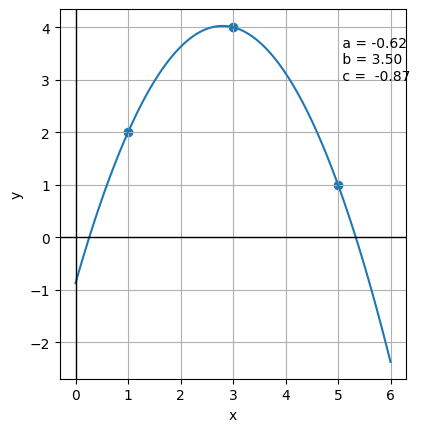

In [6]:
fig, ax = plt.subplots()

x = torch.linspace(0, 6, 100)
with torch.no_grad():
    ax.plot(x, parabola(x))
    ax.scatter(x_train, y_train)
    ax.text(5, 3, f' a = {parabola.a.item():.2f} \n b = {parabola.b.item():.2f} \n c =  {parabola.c.item():.2f}', )

format_axis(ax, legend=False)
coordinate_axes(ax)



# Fit to a Gaussian

In [7]:
class Gaussian(torch.nn.Module):
    
    def __init__(self, A = 1, x0 =1, sigma = 0.1):
        super().__init__()
        self.A = torch.nn.Parameter(torch.tensor(float(A)))
        self.x0 = torch.nn.Parameter(torch.tensor(float(x0)))
        self.sigma = torch.nn.Parameter(torch.tensor(float(sigma)))

    def forward(self, x):
        y = self.A * torch.exp(-(x - self.x0)**2 / (2 * self.sigma**2))
        return y

    

<Axes: title={'center': 'Gaussian Function'}, xlabel='x', ylabel='y'>

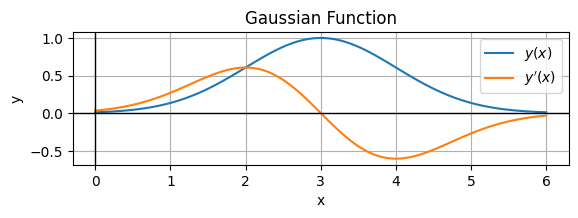

In [8]:
fig, ax = plt.subplots()

gauss = Gaussian(1, 3, 1)
x = torch.linspace(0, 6, 100, requires_grad=True)
y = gauss(x)


y.backward(torch.ones_like(y))
yp = x.grad
with torch.no_grad():
    ax.plot(x, y, label = r'$y(x)$')
    ax.plot(x, yp, label = r'$y^\prime(x)$')

format_axis(ax, title = 'Gaussian Function')
coordinate_axes(ax)


In [9]:
optimizer = torch.optim.Adam(gauss.parameters(), lr=0.1)
steps = 10000
x_train = torch.tensor([1.0, 3.0, 5.0])

y_train = torch.tensor([2.0, 4.0, 1.0])
for step in range(steps):
    optimizer.zero_grad()

    y_prediction = gauss(x_train)
    loss = torch.mean((y_prediction - y_train)**2)
    loss.backward()
    
    optimizer.step()

    if step % 1000 == 0:
        print(f'Step {step}, Loss: {loss.item()}')

Step 0, Loss: 4.408206462860107
Step 1000, Loss: 1.3073986337985843e-12
Step 2000, Loss: 4.878231152360968e-11
Step 3000, Loss: 1.59788030029695e-10
Step 4000, Loss: 2.7484977835334767e-11
Step 5000, Loss: 3.3336769456049353e-10
Step 6000, Loss: 7.631683160980174e-07
Step 7000, Loss: 0.0014786174288019538
Step 8000, Loss: 4.397075151901797e-12
Step 9000, Loss: 5.5631207942496985e-06


<Axes: title={'center': 'Gaussian Fit'}, xlabel='x', ylabel='y'>

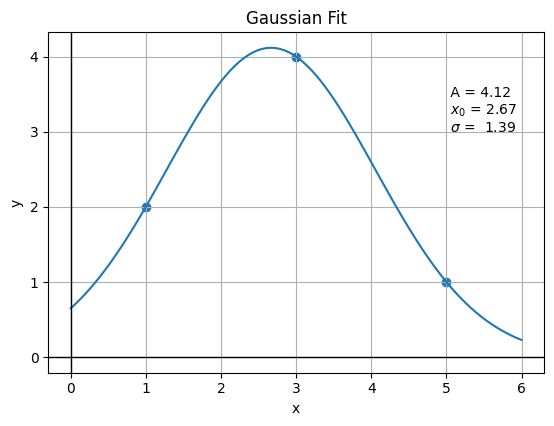

In [10]:
fig, ax = plt.subplots()

x = torch.linspace(0, 6, 100)
with torch.no_grad():
    ax.plot(x, gauss(x))
    ax.scatter(x_train, y_train)
    ax.text(5, 3, rf' A = {gauss.A.item():.2f}' +'\n'+ rf' $x_0$ = {gauss.x0.item():.2f}'+'\n'+ rf' $\sigma$ =  {gauss.sigma.item():.2f}' )

format_axis(ax, legend=False, title = 'Gaussian Fit')   
coordinate_axes(ax)



# Fit to a circle

In [11]:
class Circle(torch.nn.Module):
    
    def __init__(self, x0 = 0, y0 = 0, r = 1):
        super().__init__()
        self.x0 = torch.nn.Parameter(torch.tensor(float(x0)), requires_grad=True)
        self.y0 = torch.nn.Parameter(torch.tensor(float(y0)))
        self.r = torch.nn.Parameter(torch.tensor(float(r)))

    def forward(self):
        
        return torch.tensor([self.x0, self.y0, self.r]) 

    def graph(self, theta):
        x = self.x0 + self.r * torch.cos(theta)
        y = self.y0 + self.r * torch.sin(theta)
        return x, y

    

    

[(-1.0, 3.0), (-1.0, 3.0), None]

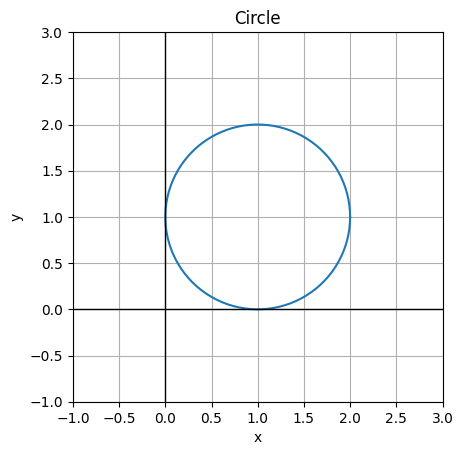

In [12]:
fig, ax = plt.subplots()

circle = Circle(1, 1, 1)
thetas = torch.linspace(0, 2 * np.pi, 100, requires_grad=True)
x, y = circle.graph(thetas)

with torch.no_grad():
    ax.plot(x, y)


format_axis(ax, title = 'Circle', legend=False) 
coordinate_axes(ax)
ax.set(xlim = (-1, 3), ylim = (-1, 3), aspect = 'equal')

In [13]:
optimizer = torch.optim.Adam(circle.parameters(), lr=0.1)
steps = 10000
x_train = torch.tensor([1.0, 3.0, 5.0])
y_train = torch.tensor([2.0, 4.0, 1.0])

def loss_func(x0, y0, r, x_train, y_train):
    current_center = [circle.x0, circle.y0]
    current_distances = torch.sqrt((x_train - circle.x0)**2 + (y_train - circle.y0)**2)
    distances_mean = torch.mean(torch.abs(current_distances - circle.r))
    return distances_mean

for step in range(steps):
    optimizer.zero_grad()

    circle_params = circle()
    loss = loss_func(*circle_params, x_train, y_train)
    loss.backward()
    optimizer.step()

    if step % 1000 == 0:
        print(f'Step {step}, Loss: {loss.item()}')

Step 0, Loss: 1.8685170412063599
Step 1000, Loss: 0.02920023538172245
Step 2000, Loss: 0.013103802688419819
Step 3000, Loss: 0.01569533348083496
Step 4000, Loss: 0.005346775054931641
Step 5000, Loss: 0.014469067566096783
Step 6000, Loss: 0.02143573760986328
Step 7000, Loss: 0.016888460144400597
Step 8000, Loss: 0.020515283569693565
Step 9000, Loss: 0.0064905486069619656


[(-1.0, 6.0), (-1.0, 5.0), None]

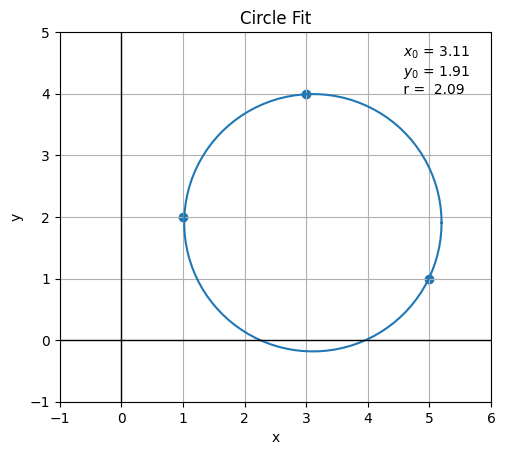

In [14]:
fig, ax = plt.subplots()

thetas = torch.linspace(0, 2 * np.pi, 100)
with torch.no_grad():
    xs, ys = circle.graph(thetas)
    ax.plot(xs, ys)
    ax.scatter(x_train, y_train)
    ax.text(4.5, 4, rf' $x_0$ = {circle.x0.item():.2f}' +'\n'+ rf' $y_0$ = {circle.y0.item():.2f}'+'\n'+ rf' r =  {circle.r.item():.2f}' )

format_axis(ax, legend=False, title = 'Circle Fit')   
coordinate_axes(ax)
ax.set(xlim = (-1, 6), ylim = (-1, 5), aspect = 'equal')


In [15]:
current_center = [circle.x0, circle.y0]

print(f'Center: {current_center}')


current_distances = torch.sqrt((x_train - circle.x0)**2 + (y_train - circle.y0)**2)
print(f'Distances: {current_distances}')
distances_mean = torch.mean(torch.abs(current_distances - circle.r))

print(f'Mean distance: {distances_mean}')

print(circle())

Center: [Parameter containing:
tensor(3.1087, requires_grad=True), Parameter containing:
tensor(1.9055, requires_grad=True)]
Distances: tensor([2.1108, 2.0973, 2.0969], grad_fn=<SqrtBackward0>)
Mean distance: 0.012704451568424702
tensor([3.1087, 1.9055, 2.0890])
